# Data Science Fundamentals 5

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Science IT Support, University Of Bern, 2020

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Part 1.

# What is Machine learning?

Unlike classical algorithms, created by human to analyze some data:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_1.png" width="60%"/>

in machine learning the data itself is used for to define the algorithm:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_2.png" width="60%"/>

Machine learning - learnign from data:
* performance on a task **T**
* improves according to measure **P**
* with experience **E**



<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_3.png" width="60%"/>


The boundary is a bit fuzzy.
In fact when we create algorithms, the problem in hand, namely the data  related to the problem, drives us to choose one or another algorithm. And we then tune it, to perform well on a task in hand. ML formalized this procedure, allowing us to automate (part) of this process.

In this 2-day course you will get acquainted with the basics of ML, where the approach to handling the data (the algorithm) is defined, or as we say "learned" from data in hand.

## Classification vs regression.

The two main tasks handled by (supervised) ML is regression and classification.
In regression we aim at modeling the relationship between the system's response (dependent variable) and one or more explanatory variables (independent variables).

Examples of regression would be predicting the temperature for each day of the year, or expenses of the household as a function of the number of children and adults.

In classification the aim is to identify what class does a data-point belong to. For example, the species or the iris plant based on the size of its petals, or whether an email is spam or not based on its content.

## Performance measures


1. Regression:
* Mean Square Error: $\textrm{MSE}=\frac{1}{n}\sum_i(y_i - \hat y(\bar x_i))^2$
* Mean Absolute Error: $\textrm{MAE}=\frac{1}{n}\sum_i|y_i - \hat y(\bar x_i)|$
* Median Absolute Deviation: $\textrm{MAD}=\textrm{median}(|y_i - \hat y(\bar x_i)|)$
* Fraction of the explained variance: $R^2=1-\frac{\sum_i(y_i - \hat y(\bar x_i))^2}{\sum_i(y_i - \bar y_i)^2}$, where $\bar y=\frac{1}{n}\sum_i y_i$

2. Classification:
* Confusion matrix 


<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/confusion_mtr.png" width="60%"/>

* Accuracy $=\frac{\textrm{TP} + \textrm{TN}}{\textrm{TP} + \textrm{FP} + \textrm{FN} + \textrm{TN}}$
* Precision $=\frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}}$ 
* Recall $=\frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}}$
* F1 $=2\frac{\textrm{Precision} \cdot \textrm{Recall}}{\textrm{Precision} + \textrm{Recall}} = \frac{2 \textrm{TP}}{2 \textrm{TP} + \textrm{FP} + \textrm{FN}}$
* Threat score (TS), or Intersection over Union: $\mathrm{IoU}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}+\mathrm{FP}}$


During model optimization the used measure in most cases must be differentiable. To this end usually some measure of similarities of distributions are employed (e.g. cross-entropy).

## Actual aim: Generalization

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_1.png" width="35%"/>

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_2.png" width="60%"/>

To measure model performance in an unbiassed way, we need to use different data than the data that the model was trained on. For this we use the 'train-test' split: e.g. 20% of all available dataset is reserved for model performance test, and the remaining 80% is used for actual model training.

# Load libraries

In [43]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free 
# software machine learning library for the Python programming language. 
# It features various classification, regression and clustering algorithms, 
# and is designed to interoperate with the Python numerical and scientific 
# libraries NumPy and SciPy. (from wiki)

from sklearn import linear_model

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics

# common visualization module
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
from imageio import imread
import pandas as pd
from time import time as timer

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [44]:
if not os.path.exists('data'):
    path = os.path.abspath('.')+'/colab_material.tgz'
    tf.keras.utils.get_file(path, 'https://github.com/neworldemancer/DSF5/raw/master/colab_material.tgz')
    !tar -xvzf colab_material.tgz > /dev/null 2>&1

# Datasets

In this course we will use several synthetic and real-world datasets to illustrate the behavior of the models and exercise our skills.

## 1. Synthetic linear

In [45]:
def get_linear(n_d=1, n_points=10, w=None, b=None, sigma=5):
  x = np.random.uniform(0, 10, size=(n_points, n_d))
  
  w = w or np.random.uniform(0.1, 10, n_d)
  b = b or np.random.uniform(-10, 10)
  y = np.dot(x, w) + b + np.random.normal(0, sigma, size=n_points)

  print('true slopes: w =', w, ';  b =', b)

  return x, y

true slopes: w = [9.41789459] ;  b = 9.746656706960593


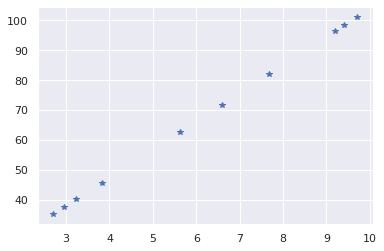

In [46]:
x, y = get_linear(n_d=1, sigma=0)
plt.plot(x[:, 0], y, '*')

true slopes: w = [8.91580536 0.60418702] ;  b = -6.982605153335422


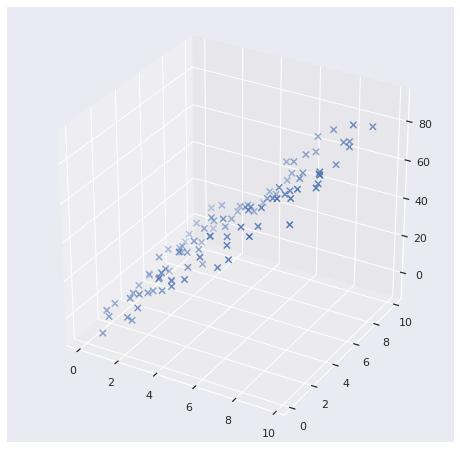

In [47]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, marker='x', color='b',s=40)

## 2. House prices

Subset of the Ames Houses dataset: http://jse.amstat.org/v19n3/decock.pdf

In [48]:
def house_prices_dataset(return_df=False, price_max=400000, area_max=40000):
  path = 'data/AmesHousing.csv'

  df = pd.read_csv(path, na_values=('NaN', ''), keep_default_na=False)
  
  rename_dict = {k:k.replace(' ', '').replace('/', '') for k in df.keys()}
  df.rename(columns=rename_dict, inplace=True)
  
  useful_fields = ['LotArea',
                  'Utilities', 'OverallQual', 'OverallCond',
                  'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                  'HeatingQC', 'CentralAir', 'Electrical',
                  '1stFlrSF', '2ndFlrSF','GrLivArea',
                  'FullBath', 'HalfBath',
                  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                  'Functional','PoolArea',
                  'YrSold', 'MoSold'
                  ]
  target_field = 'SalePrice'

  df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

  cleanup_nums = {'Street':      {'Grvl': 0, 'Pave': 1},
                  'LotFrontage': {'NA':0},
                  'Alley':       {'NA':0, 'Grvl': 1, 'Pave': 2},
                  'LotShape':    {'IR3':0, 'IR2': 1, 'IR1': 2, 'Reg':3},
                  'Utilities':   {'ELO':0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
                  'LandSlope':   {'Sev':0, 'Mod': 1, 'Gtl': 3},
                  'ExterQual':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'ExterCond':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'BsmtQual':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtCond':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtExposure':{'NA':0, 'No':1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                  'BsmtFinType1':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'BsmtFinType2':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'HeatingQC':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'CentralAir':  {'N':0, 'Y': 1},
                  'Electrical':  {'':0, 'NA':0, 'Mix':1, 'FuseP':2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                  'KitchenQual': {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Functional':  {'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2':5, 'Min1':6, 'Typ':7},
                  'FireplaceQu': {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'PoolQC':      {'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Fence':       {'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},
                  }

  df_X = df[useful_fields].copy()                              
  df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
  df_Y = df[target_field].copy()

  x = df_X.to_numpy().astype(np.float32)
  y = df_Y.to_numpy().astype(np.float32)

  if price_max>0:
    idxs = y<price_max
    x = x[idxs]
    y = y[idxs]

  if area_max>0:
    idxs = x[:,0]<area_max
    x = x[idxs]
    y = y[idxs]

  return (x, y, df) if return_df else (x,y)

In [49]:
x, y, df = house_prices_dataset(return_df=True)
print(x.shape, y.shape)
df.head()

(2847, 24) (2847,)


,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


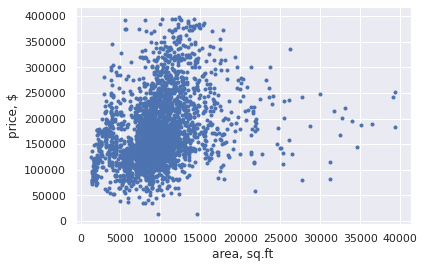

In [50]:
plt.plot(x[:, 0], y, '.')
plt.xlabel('area, sq.ft')
plt.ylabel('price, $');

## 3. Blobs

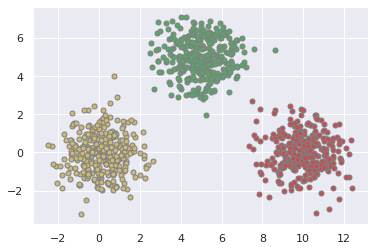

In [91]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])
colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)

## 4. MNIST

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting (taken from http://yann.lecun.com/exdb/mnist/). Each example is a 28x28 grayscale image and the dataset can be readily downloaded from Tensorflow.

In [52]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let's check few samples:

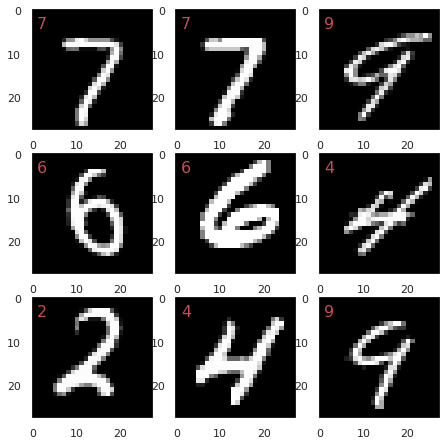

In [56]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout(0,0,0)


## 5. Fashion MNIST

`Fashion-MNIST` is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. (from https://github.com/zalandoresearch/fashion-mnist)

In [57]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Let's check few samples:

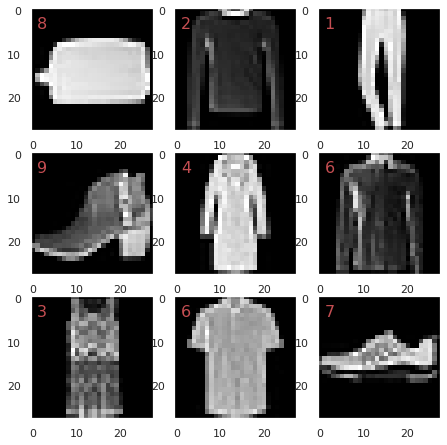

In [59]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout(0,0,0)

Each of the training and test examples is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

# `scikit-learn` interface

In this course we will primarily use the `scikit-learn` module.
You can find extensive documentation with examples in the [user guide](https://scikit-learn.org/stable/user_guide.html)

The module contains A LOT of different machine learning methods, and here we will cover only few of them. What is great about `scikit-learn` is that it has a uniform and consistent interface. 

All the different ML approaches are implemented as classes with a set of same main methods:

1. `fitter = ...`: Create object.
2. `fitter.fit(x, y[, sample_weight])`: Fit model.
3. `y_pred = fitter.predict(X)`: Predict using the linear model.
4. `s = score(x, y[, sample_weight])`: Return an appropriate measure of model performance.

This allows one to easily replace one approach with another and find the best one for the problem at hand, by simply using another regression/classification object, while the rest of the code can remain the same.


It is useful to know that generally in scikit-learn the input data is represented as a design matrix $X$ of dimensions `n_samples x n_features` , whereas the supervised labels/values are stored in a matrix $Y$ of dimensions `n_samples x n_target` .

# 1.Linear models

In many cases the scalar value of interest - dependent variable - is (or can be approximated as) linear combination of the independent variables. 

In linear regression the estimator is searched in the form: $$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

The parameters $w = (w_1,..., w_p)$ and $w_0$ are designated as `coef_` and `intercept_` in `sklearn`.

Reference: https://scikit-learn.org/stable/modules/linear_model.html

## 1. Linear regression

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fits a linear model with coefficients $w = (w_1,..., w_p)$ and $w_0$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Mathematically it solves a problem of the form: $$\min_{w} || X w - y||_2^2$$

true slopes: w = [3.40360223] ;  b = 0.7284691402166992


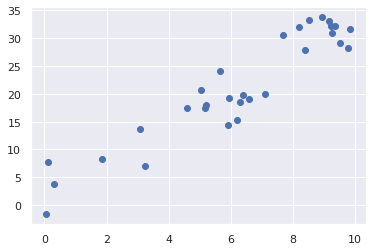

In [60]:
x, y = get_linear(n_d=1, sigma=3, n_points=30)  # p==1, 1D input
plt.scatter(x, y);

In [61]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
w, w0 = reg.coef_, reg.intercept_
print(w, w0)

[3.1439992] 1.6977883867517924


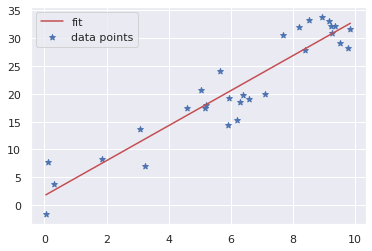

In [63]:
plt.scatter(x, y, marker='*', label='data points')
x_f = np.linspace(x.min(), x.max(), 10)
y_f = w0 + w[0] * x_f
plt.plot(x_f, y_f, label='fit', c='r')
plt.legend()
plt.show()

In [64]:
# mse
np.std(y - reg.predict(x))  # or use metrics.mean_squared_error(..., squared=False)

3.364945108449922

In [65]:
# R2
reg.score(x, y) 

0.8801926049349899

Let's try 2D input. 
Additionally, here we will split the whole dataset into training and test subsets using the `train_test_split` function:

true slopes: w = [8.35195741 7.64688278] ;  b = -9.319194607968122


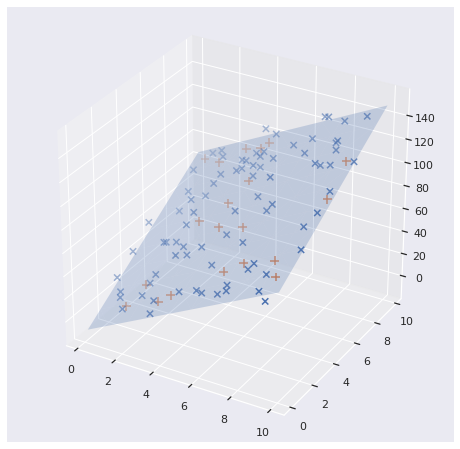

In [67]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=100, sigma=5)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='x', s=40)
ax.scatter(x_test[:,0], x_test[:,1], y_test, marker='+', s=80)

xx0 = np.linspace(x[:,0].min(), x[:,0].max(), 10)
xx1 = np.linspace(x[:,1].min(), x[:,1].max(), 10)
xx0, xx1 = [a.flatten() for a in np.meshgrid(xx0, xx1)]
xx = np.stack((xx0, xx1), axis=-1)
yy = reg.predict(xx)
ax.plot_trisurf(xx0, xx1, yy, alpha=0.25, linewidth=0)
plt.show()

In [68]:
# mse
print('train mse =', np.std(y_train - reg.predict(x_train)))
print('test mse =', np.std(y_test - reg.predict(x_test)))

train mse = 5.165466668661318
test mse = 3.7510302790820305


In [69]:
# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

train R2 = 0.9765136091224756
test R2 = 0.9829566656359935


## EXERCISE 1.

Use linear regression to fit house prices dataset.

In [ ]:
x, y = house_prices_dataset()

# 1. make train/test split

# 2. fit the model

# 3. evaluate MSE, MAE, and R2 on train and test datasets

# 4. plot y vs predicted y for test and train parts

## 2. Logistic regression

Logistic regression, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In logistic regression the probability $p$ of a point belonging to a class is modeled as: $$\frac{p}{1-p} = e^{w_0 + w_1 x_1 + ... + w_p x_p}$$

The binary class $\ell_2$ penalized logistic regression minimizes the following cost function:
$$\min_{w, c}  \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) + \lambda \frac{1}{2}w^T w$$.

training accuracy : 0.995 (multinomial)


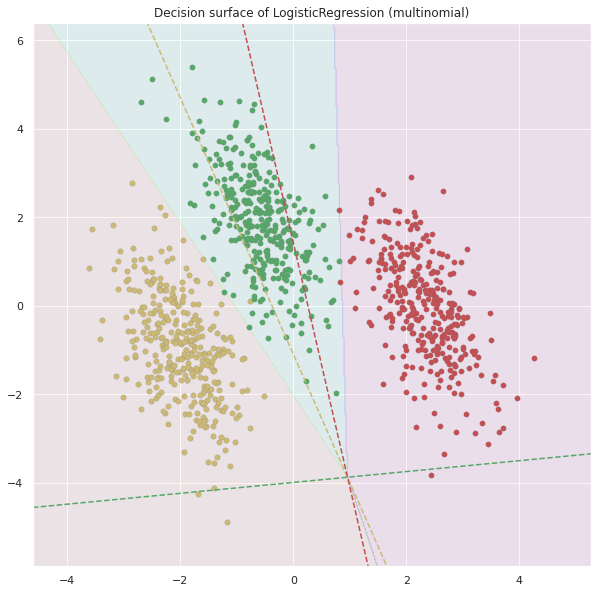

training accuracy : 0.976 (ovr)


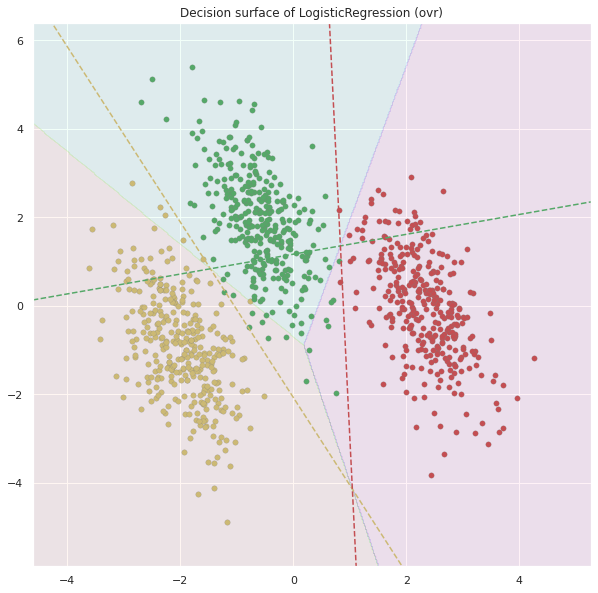

In [90]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
x, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
x = np.dot(x, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = linear_model.LogisticRegression(solver='sag', max_iter=100,
                             multi_class=multi_class)
    clf.fit(x, y)

    # print the training scores
    print("training accuracy : %.3f (%s)" % (clf.score(x, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    z = z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, z, cmap='hsv', alpha=0.05)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = 'ygr'

    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(x[idx, 0], x[idx, 1], c=color, cmap=plt.cm.Paired, 
                    edgecolor='gray', s=30, linewidth=0.2)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

    plt.show()

## EXERCISE 2.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

We will reshape 2-d images to 1-d arrays for use in scikit-learn:

In [ ]:
n_train = len(train_labels)
x_train = train_images.reshape((n_train, -1))
y_train = train_labels

n_test = len(test_labels)
x_test = test_images.reshape((n_test, -1))
y_test = test_labels

Now use a multinomial logistic regression classifier, and measure the accuracy:

In [ ]:
# 1. Create classifier

# 2. fit the model

# 3. evaluate accuracy on train and test datasets